# 05 CNN Forward Method - PyTorch Deep Learning Implementation
## Review

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

The `forward()` method is the **actual network transformation**. <br>The forward method is the mapping that maps an **input tensor** to a prediction **output tensor**. Let's see how this is done.

This means that the forward method implementation will use **all of the layers** we defined inside the constructor. In this way, the **forward method** explicitly defines the **network's transformation**.

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size = 5)
        
        self.fc1 = nn.Linear(in_features = 12*4*4,out_features = 120)
        self.fc2 = nn.Linear(in_features = 120,out_features = 60)
        self.out = nn.Linear(in_features = 60,out_features = 10)
        
    def forward(self,t):
        # implement the forward pass
        return t

## Input Layer 1

The **input layer** of any neural network is determined by the **input data**. 

```python
def forward(self,t):
    #(1) input ;ayer
    t = t
```

## Hidden Convolutional Layers: Layers 2 And 3

To preform the convolution operation, we pass the tensor to the forward method of the first convolutional layer, `self.conv1`. We've learned how all PyTorch neural network modules have `forward()` methods, and when we call the `forward()` method of a `nn.Module`, there is a special way that we make the call.

When want to call the `forward()` method of a `nn.Module` instance, we call the actual instance instead of calling the `forward()` method directly.

Instead of doing this `self.conv1.forward(tensor)`, we do this `self.conv1(tensor)`.

```python
# (2) hidden conv layer
t = self.conv1(t)
t = F.relu(t)
t = F.max_pool2d(t, kernel_size=2, stride=2)

# (3) hidden conv layer
t = self.conv2(t)
t = F.relu(t)
t = F.max_pool2d(t, kernel_size=2, stride=2)
```

As we can see here, our input tensor is transformed as we move through the convolutional layers. The first convolutional layer has a convolutional operation, followed by a **relu activation** operation whose output is then passed to a max pooling operation with `kernel_size=2` and `stride=2`.(其中kernel size就是filter的大小)

The output tensor `t` of the first convolutional layer is then passed to the next convolutional layer, which is identical except for the fact that we call `self.conv2()` instead of `self.conv1()`.

Each of these layers is comprised of a collection of weights (data) and a collection operations (code). The weights are encapsulated inside the `nn.Conv2d()` class instance. The `relu()` and the `max_pool2d()` calls are just **pure operations**. Neither of these have weights, and this is why we call them directly from the `nn.functional` API.

Sometimes we may see `pooling operations` referred to as pooling layers. Sometimes we may even hear activation operations called activation layers.

**However**, what makes a layer **distinct** from an operation is that layers have **weights**. Since `pooling` operations and `activation` functions **do not have weights**, we will refer to them as **operations** and view them as being added to the collection of layer operations.

**确定一个操作能不能叫做layer就看他有没有weights，不过也别被这些术语搞糊涂了，我们就是通过一系列方法的组合来实现这个`forward()`**

Don't let these terms confuse the fact that the whole network is simply a composition of functions, and what we are doing now is defining this composition inside our `forward()` method.

## Hidden Linear Layers: Layers 4 And 5
Before we pass our input to the first hidden linear layer, we must `reshape()` or `flatten` our tensor. This will be the case any time we are passing output from a convolutional layer as input to a linear layer.

Since the forth layer is the first linear layer, we will include our reshaping operation as a part of the forth layer.

```python
# (4) hidden linear layer
t = t.reshape(-1, 12 * 4 * 4)
t = self.fc1(t)
t = F.relu(t)

# (5) hidden linear layer
t = self.fc2(t)
t = F.relu(t)
```

number `12` in the reshaping operation is determined by the number of output channels coming from the previous convolutional layer(`out_channels=12`).

The `4 * 4` is actually the height and width of each of the 12 output channels.

The height and width dimensions have been reduced from `28 x 28` to `4 x 4` by the convolution and pooling operations.

After the tensor is reshaped, we pass the `flattened` tensor to the linear layer and pass this result to the `relu() activation function`.

## Output Layer 6

The sixth and last layer of our network is a linear layer we call the **output layer**. When we pass our tensor to the output layer, the result will be the **prediction tensor**. Since our data has ten prediction classes, we know our output tensor will have ten elements.

```python
# (6) output layer
t = self.out(t)
#t = F.softmax(t, dim=1)
```
Inside the network we usually use `relu()` as our `non-linear activation function`, but for the output layer, whenever we have a single category that we are trying to predict, we use `softmax()`. The `softmax function` returns a positive probability for each of the prediction classes, and the probabilities sum to `1`.

**However**, in our case, we won't use `softmax()` because the loss function that we'll use, `F.cross_entropy()`, implicitly performs the `softmax()` operation on its input, so we'll just return the result of the last linear transformation.

The implication of this is that our network will be trained using the softmax operation but will not need to compute the additional operation when the network is used for inference after the training process is complete.

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size = 5)
        
        self.fc1 = nn.Linear(in_features = 12*4*4,out_features = 120)
        self.fc2 = nn.Linear(in_features = 120,out_features = 60)
        self.out = nn.Linear(in_features = 60,out_features = 10)
        
    def forward(self,t):
        # (1) input layer
        t = t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)

        return t

## Quiz 05
Q1:In neural network programming, the forward method of a network instance explicitly defines the network's ______________<br>
A1:transformation

Q2:In neural network programming, the forward method of a network instance is the mapping that maps an input tensor to a prediction output tensor.<br>
A2:**True**

Q3:The input layer of any neural network is determined by the input data. For this reason, we can think of the input layer as the identity transformation. Mathematically, this is the function,$$f(x)=x$$
A3:**True**

Q4:In neural network programming, all layers that are not the input or output layers are called hidden layers.<br>
A4:**True**

Q5:In neural network programming, the operations that are defined using _______________ are called layers.<br>
A5:weights

Q6:In the most general sense, neural networks are mathematical functions. Terms like layers, activation functions, and weights, are just used to help describe the different parts.<br>
A6:**True**

[Reference](https://deeplizard.com/learn/video/MasG7tZj-hw)

---
---

# 06 CNN Image Prediction With PyTorch - Forward Propagation Explained

## What Is Forward Propagation?

*Forward propagation* is the process of transforming an input tensor to an output tensor. <br>
At its core, a neural network is a function that maps an input tensor to an output tensor, and *forward propagation* is just a special name for the process of **passing an input to the network and receiving the output** from the network.

For our network, what this means is simply passing our input tensor to the network and receiving the output tensor. To do this, we pass our sample data to the network's `forward()` method.

This is why, the `forward()` method has the name *forward*, the execution of **the `forward()` is the process of forward propagation**.

The word *forward*, is pretty *straight forward*. ;)

However, the word *propagate* means to move or transmit *through some medium*. In the case of **neural networks**, data propagates through the **layers of the network**.

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)

In [13]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST'
    ,train = True
    ,download = True
    ,transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

In [29]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1,out_channels = 6,kernel_size = 5)
        self.conv2 = nn.Conv2d(in_channels = 6,out_channels = 12,kernel_size = 5)
        
        self.fc1 = nn.Linear(in_features = 12*4*4,out_features=120)
        self.fc2 = nn.Linear(in_features = 120,out_features=60)
        self.out = nn.Linear(in_features = 60,out_features=10)
        
    def forward(self,t):
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size = 2,stride = 2)
        
        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size = 2,stride = 2)
        
        t = F.relu(self.fc1(t.reshape(-1,12*4*4)))
        t = F.relu(self.fc2(t))
        t = self.out(t)
        
        return t

## Predicting With The Network: Forward Pass

Before we being, we are going to **turn off PyTorch’s gradient calculation feature**. This will stop PyTorch from automatically building a computation graph as our tensor flows through the network.
![pytorch neuron](https://deeplizard.com/images/neural%20network%202%203%202.png)

The computation graph keeps track of the network's mapping by tracking each computation that happens. The graph is used during the training process to calculate the derivative (gradient) of the loss function with respect to the network’s weights.

**Since we are not training the network yet, we aren’t planning on updating the weights, and so we don’t require gradient calculations. We will turn this back on when training begins.**

This process of tracking calculations happens in real-time, as the calculations occur.Turning it off isn’t strictly necessary but having the feature turned off does reduce memory consumption since the graph isn't stored in memory. This code will turn the feature off.
```python
torch.set_grad_enabled(False) 
```

### Passing A Single Image To The Network


In [30]:
torch.set_grad_enabled(False)

In [31]:
network = Network()

Next, we’ll procure a **single** sample from our training set, unpack the image and the label, and verify the image’s shape:

In [32]:
sample = next(iter(train_set))
image,label = sample
image.shape
#The image tensor’s shape indicates that we have a single channel image 
#that is 28 in height and 28 in width. Cool, this is what we expect.

torch.Size([1, 28, 28])

In [33]:
label

9

Now, there's a second step we must preform before simply passing this tensor to our network. When we pass a tensor to our network, the network is expecting a **batch**, so even if we want to pass a single image, we still need a batch.

This is no problem. We can create **a batch that contains a single image**. All of this will be packaged into a single **four dimensional tensor** that reflects the following dimensions.

This requirement of the network **arises from** the fact that the `forward()` method's in the `nn.Conv2d` convolutional layer classes expect their tenors to have **4 dimensions**. This is pretty standard as most neural network implementations deal with batches of input samples rather than single samples.

To put our single sample image tensor into a batch with a size of 1, we just need to `unsqueeze()` the tensor to add an additional dimension. [squeeze tutorial](https://deeplizard.com/learn/video/fCVuiW9AFzY)

In [34]:
# Inserts an additional dimension that represents a batch of size 1
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [35]:
pred = network(image.unsqueeze(0)) 
# image shape needs to be (batch_size × in_channels × H × W)

In [36]:
pred

tensor([[ 0.0207, -0.0841, -0.0833,  0.1248, -0.0734, -0.0905, -0.0102, -0.0013,  0.0937, -0.0687]])

And we did it! We've used our forward method to get a prediction from the network. The network has returned a prediction tensor that contains a prediction value for each of the ten categories of clothing.

In [37]:
pred.shape

torch.Size([1, 10])

In [38]:
 pred.argmax(dim=1)

tensor([3])

In [39]:
label

9

For each input in the batch, and for each prediction class, we have a prediction value. If we wanted these values to be probabilities, we could just the `softmax()` function from the `nn.functional` package.

In [40]:
F.softmax(pred, dim=1)

tensor([[0.1036, 0.0933, 0.0933, 0.1149, 0.0943, 0.0927, 0.1004, 0.1013, 0.1114, 0.0947]])

In [41]:
F.softmax(pred, dim=1).sum()

tensor(1.)

In [42]:
print( pred.argmax(dim=1))
print(label)

tensor([3])
9


The label for the first image in our training set is `9`, and using the `argmax()` function we can see that the highest value in our prediction tensor occurred at the class represented by index `3`.

The prediction in this case is **incorrect**, **which is what we expect** because the weights in the network were generated randomly.

In [43]:
pred

tensor([[ 0.0207, -0.0841, -0.0833,  0.1248, -0.0734, -0.0905, -0.0102, -0.0013,  0.0937, -0.0687]])

### Network Weights Are Randomly Generated
There are a couple of important things we need to point out about these results. Most of the probabilities came in close to `10%`, and this `makes sense` because our network is guessing and we have ten prediction classes coming from a `balanced dataset`.

Another implication of the randomly generated weights is that **each time we create a new instance of our network**, the **weights** within the network will be **different**. This means that the predictions we get will be different if we create different networks. Keep this in mind. Your predictions will be different from what we see here.

In [44]:
net1 = Network()
net2 = Network()

In [45]:
net1(image.unsqueeze(0))

tensor([[ 0.0299,  0.0675, -0.0123,  0.0595,  0.0621,  0.0469, -0.1198,  0.0559,  0.1360,  0.1458]])

In [46]:
net2(image.unsqueeze(0))

tensor([[ 0.0902,  0.0108,  0.0641,  0.0207, -0.0602,  0.0682, -0.0044, -0.0218,  0.0343,  0.0474]])

## Quiz 06
Q1:_____________ is the process of transforming an input tensor to an output tensor.<br>A1:Forward propagation

Q2:The concept of forward propagation is used to indicate that the input tensor data is transmitted through the network in the backward direction.<br>
A2:**False**

Q3:In neural network programming, the computational graph keeps track of the network's mapping by tracking each computation that happens. The graph is used during the training process to calculate the derivative (gradient) of the loss function with respect to the network’s ______________<br>
A3:weights

Q4:Suppose we have a balanced dataset with ten different classes. Choose an image from this dataset and pass the image to a CNN that has randomly initialized weights. In this situation, what is the approximate prediction probability should we expect to see across all the prediction classes?<br>
A4:10%

Q5:Suppose we have the pred tensor below. What will be the output of the sum() of the softmax().
```python
> pred
tensor([[0.0991, 0.0916, 0.0907, 0.0949, 0.1013, 0.0922, 0.0990, 0.1130, 0.1107, 0.1074]])

> F.softmax(pred, dim=1).sum()
```
A5:tensor(1.)

[Reference](https://deeplizard.com/learn/video/6vweQjouLEE)

---
---

# 07 Neural Network Batch Processing - Pass Image Batch To PyTorch CNN

## Neural Network Batch Processing With PyTorch

### Passing A Batch Of Images To The Network
We need the following:
* Our imports.
* Our training set.
* Our Network class definition.
* To disable gradient tracking. (optional)
* A Network class instance.

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)

In [5]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST'
    ,train = True
    ,download = True
    ,transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

In [49]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size = 5)
        
        self.fc1 = nn.Linear(in_features = 12*4*4,out_features = 120)
        self.fc2 = nn.Linear(in_features = 120,out_features = 60)
        self.out = nn.Linear(in_features = 60,out_features = 10)
        
    def forward(self,t):
        # (1) input layer
        t = t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)

        return t

In [50]:
torch.set_grad_enabled(False)

In [61]:
network = Network()

Now, we’ll use our training set to create a new `DataLoader` instance, and we’ll set our `batch_size=10`, so the outputs will be more manageable.

In [62]:
data_loader = torch.utils.data.DataLoader(
    train_set,batch_size = 10
)

In [63]:
batch = next(iter(data_loader))
images,labels = batch

This gives us **two tensors**, a tensor of **images** and a tensor of **corresponding labels**.

In the last episode, when we pulled a single image from our training set, we had to `unsqueeze()` the tensor to add another dimension that would effectively transform the singleton image into a batch with a size of one. Now that we are working with the *data loader*, we are dealing with batches by default, so there is no further processing needed.

The data loader returns a batch of images that are packaged into a single tensor with a shape that reflects the following axes.

`(batch size, input channels, height, width)`

This means tensor's shape is in **good shape**, and there's **no need to unsqueeze it**. ;)

In [64]:
images.shape

torch.Size([10, 1, 28, 28])

In [65]:
labels.shape

torch.Size([10])

The first axis of the image tensor tells us that we have a **batch of ten images**. These ten images have **a single color channel** with a **height** and **width** of twenty-eight.

The labels tensor has a single axis with a shape of ten, which corresponds to the **ten images** inside our batch. **One label for each image**.

In [66]:
preds = network(images)

In [67]:
preds.shape

torch.Size([10, 10])

In [68]:
preds

tensor([[ 1.6467e-02, -3.2971e-02, -1.4058e-01, -1.2443e-01,  9.6093e-02, -1.4053e-01, -4.4303e-02, -9.8937e-03,
         -4.1751e-02, -1.5865e-03],
        [ 1.1554e-02, -3.5275e-02, -1.4306e-01, -1.2657e-01,  9.1447e-02, -1.5218e-01, -3.6254e-02, -1.4780e-02,
         -3.2344e-02, -6.0051e-03],
        [ 2.5395e-02, -5.6169e-02, -1.3118e-01, -1.3064e-01,  1.0796e-01, -1.2940e-01, -4.1606e-02, -2.5502e-02,
         -4.0450e-02,  3.5781e-03],
        [ 1.9997e-02, -4.8922e-02, -1.3441e-01, -1.2610e-01,  1.0554e-01, -1.3486e-01, -4.2117e-02, -2.1434e-02,
         -3.6143e-02,  7.5589e-04],
        [ 9.6969e-04, -4.9612e-02, -1.3271e-01, -1.2524e-01,  1.0999e-01, -1.4848e-01, -4.4680e-02, -1.5122e-02,
         -3.4455e-02,  3.3246e-03],
        [ 2.5426e-02, -3.6826e-02, -1.3773e-01, -1.2568e-01,  9.1324e-02, -1.4248e-01, -4.1219e-02, -1.4956e-02,
         -3.4798e-02, -1.1648e-02],
        [ 1.8192e-02, -3.0211e-02, -1.4076e-01, -1.2476e-01,  9.3960e-02, -1.2872e-01, -4.6744e-02, -1.716

The prediction tensor has a shape of `10 by 10`, which gives us two axes that each have a length of ten. This reflects the fact that we have ten images and for each of these ten images we have ten prediction classes.

`(batch size, number of prediction classes)`

The elements of the **first dimension** are arrays of length ten. Each of these array elements contain the **ten predictions** for each category for the corresponding image.

The elements of the **second dimension** are **numbers**. Each number is the assigned value of the specific output class. The output classes are encoded by the indexes, so each index represents a specific output class. This mapping is given by this table.

## Using Argmax: Prediction Vs Label

To check the predictions against the labels, we use the `argmax()` function to figure out which index contains the **highest prediction value**. Once we know which index has the highest prediction value, we can **compare the index with the label** to see if there is a **match**.

To do this, we call the `argmax()` function on the prediction tensor, and we specify **second dimension**.

The **second dimension** is the **last dimension** of our prediction tensor. Remember from all of our work on tensors, the last dimension of a tensor always contains **numbers** while every other dimension contains other **smaller tensor**.

一个tensor的最后一维就是一个具体数字，再往高维走就是一个tensor

In our prediction tensor's case, we have ten groups of numbers. What the `argmax()` function is doing is looking inside each of these ten groups, finding the max value, and outputting its index.

For each group of ten numbers:
* Find max value.
* Output index

The interpretation of this is that, for each of the images in the batch, we are finding the prediction class that has the **highest value**. This is the category the network is **predicting most strongly**.

In [69]:
preds.argmax(dim=1)

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [70]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

The result from the `argmax()` function is a tensor of ten prediction categories. Each number is the index where the highest value occurred. We have ten numbers because there were ten images. Once we have this tensor of indices of highest values, we can compare it against the label tensor.

In [71]:
preds.argmax(dim=1).eq(labels)

tensor([False, False, False, False, False, False, False, False, False, False])

In [72]:
preds.argmax(dim=1).eq(labels).sum()

tensor(0)

To achieve the comparison, we are using the `eq()` function. The `eq()` function computes an element-wise equals operation between the argmax output and the `labels` tensor.

This returns `True` if the prediction category in the argmax output matches the label and `False` otherwise.

Finally, if we call the `sum()` function on this result, we can reduce the output into a single number of correct predictions inside this scalar valued tensor.

We can wrap this last call into a function called `get_num_correct()` that accepts the predictions and the labels, and uses the `item()` method to return the Python number of correct predictions.

In [73]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [74]:
get_num_correct(preds, labels)

0

## Quiz 07

Q1:In many neural network APIs, networks accept batches of images as input.<br>
A1:**True**

Q2:In neural network programming, when we pull a single image from the training set, we unsqueeze the image tensor to add another dimension so that the tensor is transformed into a ______________<br>
A2:batch tensor with one image

Q3:Suppose we have a label tensor with a shape of ten. The value of ten in the shape corresponds to the ten images inside the _______________. One label for each image.<br>
A3:batch

Q4:Suppose the prediction tensor output from a network has a shape of ten by ten. This information tells us that we have a batch of ten images and ten prediction classes in the training set.<br>
```python
> preds.shape
torch.Size([10, 10])
```
A4:**True**

Q5:When we call the argmax() function on a prediction tensor, the argmax() function looks inside each of the ten prediction groups, finds the max value, and outputs the value.<br>
```python
> preds.argmax(dim=1)
tensor([5, 5, 5, 5, 5, 5, 4, 5, 5, 4])
```
A5:**False**

Q6:When we call the `argmax()` function on a prediction tensor, the `argmax()` function looks inside each of the ten prediction groups, finds the max value, and outputs the index location of the max value.<br>
A6:**True**

[Reference](https://deeplizard.com/learn/video/p1xZ2yWU1eo)

---
---

# 08 CNN Output Size Formula - Bonus Neural Network Debugging Session

## CNN Output Size Formula - Tensor Transformations

### High-Level Overview Of Our Process  整体回顾做深度学习的过程
* Prepare the data
* Build the model
  * **Understanding forward pass transformations**
* Train the model
* Analyze the model’s results

### Overview Of Our Network
The CNN we will use is the one that we have been working with over the last few posts that has **six layers**.
1. Input layer
2. Hidden conv layer
3. Hidden conv layer
4. Hidden linear layer
5. Hidden linear layer
6. Output layer

We built this network using PyTorch’s `nn.Module` class, and the `Network` class definition is as follows:

In [6]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        # (1) input layer
        t = t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)

        return t

### Passing A Batch Of Size One (A Single Image)

In a previous episode, we saw how we can pass a single image by adding a batch dimension using PyTorch’s `unsqueeze()` method. We’ll pass this tensor to the network again, but this time we will step through the `forward()` method using the *debugger*(可以用VSCode的Debugger). This will allow us to inspect our tensor as transformations are performed.

In [7]:
network = Network()
sample = next(iter(train_set))
image,label = sample

output = network(image.unsqueeze(0))

#### #1 Input Layer
When the tensor comes into the input layer, we have:
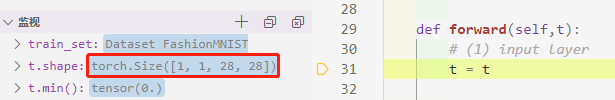
This value in each of these dimensions represent the following values:  
**(batch size, color channels, height, width)**   

Since the input layer is just the **identity function**, the output shape doesn’t change.The input layer can be regarded as the trivial identity function, **output** of the layer is **equal** to the **input**.

#### #2 Convolutional Layer (1)
When the tensor comes into this layer, we have:
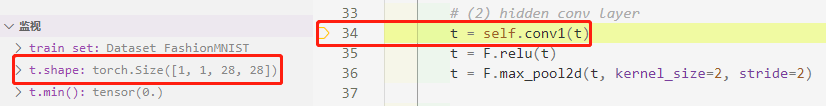  

After the first convolution operation `self.conv1`, we have:
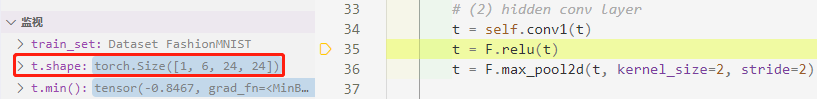  
The `batch_size` is fixed as we move through the forward pass.  

The number of color channels has increased from `1` to `6`. After we move forward beyond the first convolutional layer, we don’t think of the **channels** as **color channels** any longer. We just think of them as **output channels**. The reason we have `6` output channels is due to the number of `out_channels` that we specified when `self.conv1` was created.  
`self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)`  


### Convolution Operations Use Filters

Like we have seen, this number `6` is arbitrary. The **out_channels** parameter instructs the `nn.Conv2d` layer class generate **six filters**, also known as kernels, with shape `5 by 5` with **randomly initialized** values. These filters are used to generate the six output channels.

**The `out_channels` parameter determines how many `filters` will be created.**  
**其中`kernel_size` 就是filter的大小**

The **filters** are **tensors**, and they are used to convolve the input tensor when the tensor is passed to the layer instance, `self.conv1`. The random values inside the filter tensors are the **weights** of the convolutional layer. Remember though, **we don't actually have six distinct tensor**. All six of the **filters are packaged into a single weight tensor** that has a height and width of five. 

在计算过程中并不是单独生成6个filter的tensor，而是这6个filter会打包成一个大的tensor，其中每个tensor都是5*5的

**The filters are the weight tensors.**

After the **weight tensors (filters)** are used to convolve the input tensor, the result is the **output channels**.

Another name for **output channels** is **feature maps**. The terms here are interchangeable. This is due to the fact that the pattern detection that emerges as the weights are updated represent features like edges and other more sophisticated patterns.

The algorithm:
1. Color channels are passed in.
2. Convolutions are performed using the weight tensor (filters).
3. Feature maps are produced and passed forward.

Conceptually, we can think of the weight tensors as being distinct. However, what we really have in code is **a single weight tensor** that has an **out_channels (filters) dimension**. We can see this by checking the shape of the weight tensor:
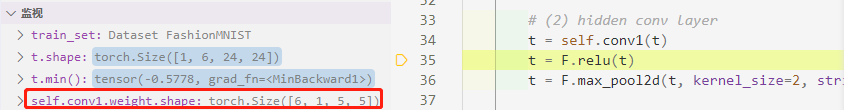

This tensor’s shape is given by:  
**(number of filters, number of input channels, filter height, filter width)**

### The `relu()` Activation Function

The call to the `relu()` function removes any **negative values** and replaces them with **zeros**. We can verify this by checking the `min()` of the tensor before and after the call.  

**Before:**
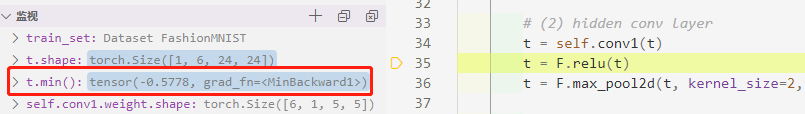

**After:**
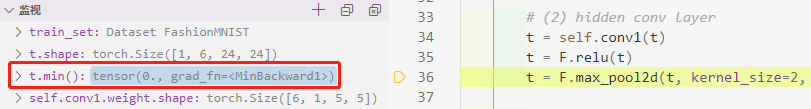

The `relu()` function can be expressed mathematically as
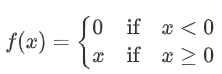

### The Max Pooling Operation
The pooling operation reduces the shape of our tensor further by extracting the maximum value from each `2x2` location within our tensor.

4个里面挑1个最大的留下，其他舍去，所以相当于横向舍掉一半，纵向舍掉一半，最终整个t的两维都降为原来一半

Before：
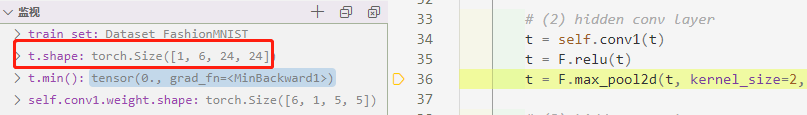

After：
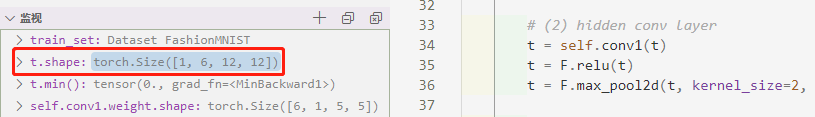

### Convolution Layer Summary
The shapes of the tensor input to and output from the convolutional layer is given by:
* Input shape: [1, 1, 28, 28]
* Output shape: [1, 6, 12, 12]

  
  
Summary of each operation that occurs:
1. The convolution layer convolves the input tensor using six randomly initialized `5x5` filters.
  * This reduces the height and width dimensions by four.
2. The relu activation function operation maps all negative values to `0`.
  * This means that all the values in the tensor are now positive.
3. The max pooling operation extracts the max value from each `2x2` section of the six feature maps that were created by the convolutions.
  * This reduced the height and width dimensions by twelve.

## CNN Output Size Formula
Let's have a look at the formula for computing the output size of the tensor after performing convolutional and pooling operations.
### CNN Output Size Formula (Square)
* Suppose we have an <math>
  <mi>n</mi>
  <mo>&#xD7;</mo>
  <mi>n</mi>
</math> input.
* Suppose we have an <math>
  <mi>f</mi>
  <mo>&#xD7;</mo>
  <mi>f</mi>
</math> filter.
* Suppose we have a padding of $p$ and a stride of $s$.  


The output size $O$ is given by this formula:
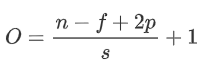
This value will be the height and width of the output. However, if the input or the filter **isn't a square**, this formula needs to be applied twice, once for the width and once for the height.[Non-Square link](https://deeplizard.com/learn/video/cin4YcGBh3Q)

#### #3 Convolutional Layer (2)
The second hidden convolutional layer `self.conv2`, transforms the tensor in the same was as `self.conv1` and reduces the height and width dimensions further. Before we run through these transformations, let’s check the shape of the weight tensor for `self.conv2`:
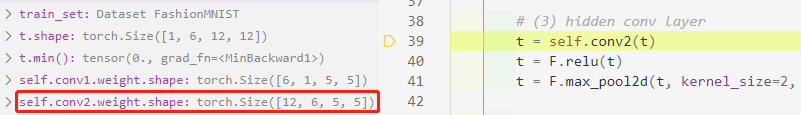

This tensor’s shape is given by:  
**(number of filters, number of input channels, filter height, filter width)**

This time our weight tensor has **twelve filters** of height of five and width of five, but **instead of having a single input channel**, the number of channels is is coming in at **six**, which gives the filters a **depth**. This accounts for the six output channels from the first convolutional layer.因为第一个conv层中用了6个filter，所以就相当于输出6个channel，在这里我们把这个6理解为这conv2层中filter的厚度   
`self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)` <br>The resulting **output will** have **twelve channels**.
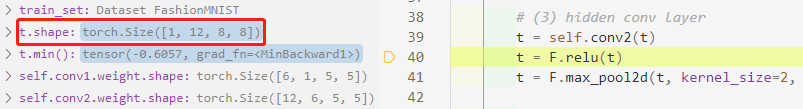

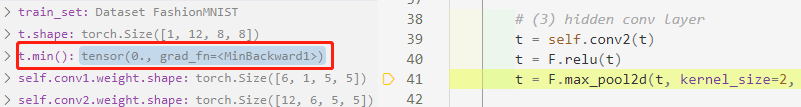

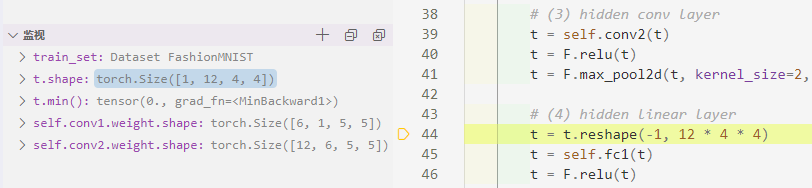

The shape of the resulting **output** of `self.conv2` allows us to see why we reshape the tensor using `12*4*4` before passing the tensor to the first linear layer, `self.fc1`. 

As we have seen in the past, this particular reshaping is called **flattening** the tensor. The `flatten operation` puts all of the tensor’s elements into a **single dimension** output.
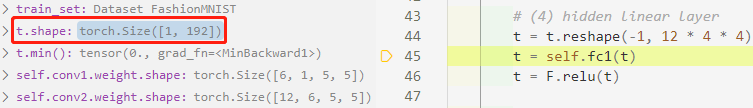

The resulting shape is `1x192`. The `1` in this case represents the **batch size**, and the `192` is the number of elements in the tensor that are now in the same dimension.

#### #4 #5 #6 Linear Layers
Now, we just have a series of **linear layers** followed by non-linear activation function until we reach the output layer.<br>
`self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)`

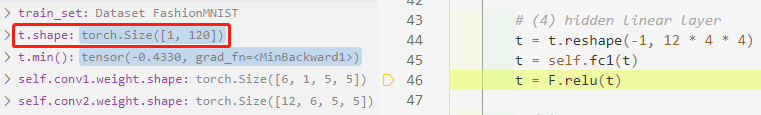

`self.fc2 = nn.Linear(in_features=120, out_features=60)`
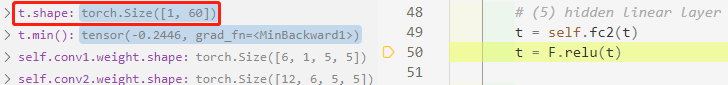

`self.out = nn.Linear(in_features=60, out_features=10)`
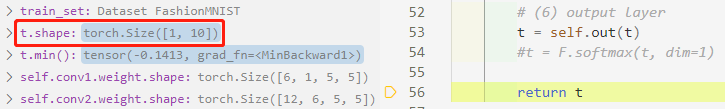

In [8]:
print(output)

tensor([[ 0.0570,  0.0405,  0.1151,  0.0390,  0.1634, -0.0542,  0.0824,  0.0600,  0.1281, -0.0988]],
       grad_fn=<AddmmBackward>)


This table summarizes the shape changing operations and the resulting shape of each:

| **Operation** | **Output Shape** |
| --- | --- |
| Identity function | `torch.Size([1, 1, 28, 28])` |
| Convolution `(5 x 5)` | `torch.Size([1, 6, 24, 24])` |
| Max pooling `(2 x 2)` | `torch.Size([1, 6, 12, 12])` |
| Convolution `(5 x 5)` | `torch.Size([1, 12, 8, 8])` |
| Max pooling `(2 x 2)` | `torch.Size([1, 12, 4, 4])` |
| Flatten (reshape) | `torch.Size([1, 192])` |
| Linear transformation | `torch.Size([1, 120])` |
| Linear transformation | `torch.Size([1, 60])` |
| Linear transformation | `torch.Size([1, 10])` |